In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
comp_marks = pd.read_csv('comp_marks.csv')
comp_portrait = pd.read_csv('comp_portrait.csv')
comp_students = pd.read_csv('comp_students.csv')

# 1. Подбор параметров из comp_marks.csv

In [3]:
comp_marks.head()

,ISU,ST_YEAR,SEMESTER,TYPE_NAME,MARK,MAIN_PLAN,DISC_ID,PRED_ID
0,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,10502311854018326223,5087927234000983963
1,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,1601392918367593206,5087927234000983963
2,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,9559803959325174929,5087927234000983963
3,17623928044460629977,2020,1,Зачет,зачет,4664712865904477750,8955667882044263414,5087927234000983963
4,17623928044460629977,2020,1,Экзамен,3,4664712865904477750,17741967398854095262,5087927234000983963


In [4]:
comp_marks['MARK'].unique()

array(['зачет', '3', '4', 'незач', '5', '2', 'осв', nan, 'неявка'],
      dtype=object)

In [5]:
comp_marks_2 = comp_marks

comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '5', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '4', int(4), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '3', int(3), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == '2', int(2), comp_marks_2.MARK)

comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'зачет', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'осв', int(5), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'незач', int(2), comp_marks_2.MARK)
comp_marks_2['MARK'] = np.where(comp_marks_2.MARK == 'неявка', int(2), comp_marks_2.MARK)

comp_marks_2['MARK'] = comp_marks['MARK'].fillna(comp_marks['MARK'].median())

In [6]:
comp_marks_2['MARK'].unique()

array([5., 3., 4., 2.])

In [7]:
avg_mark = comp_marks_2.pivot_table(index = 'ISU', values = ['MARK'])
avg_mark = avg_mark.rename (columns= {'MARK': 'AVG_MARK'})

avg_mark.head()

,AVG_MARK
ISU,
999504425170639,4.698413
16243099018784918,4.035088
22160896830459167,4.650000
23604312120912668,3.117647
33612688142435218,4.655738


In [8]:
avg_mark_disc = comp_marks_2.pivot_table(index = 'DISC_ID', values = ['MARK'])
avg_mark_disc = avg_mark_disc.rename (columns= {'MARK': 'AVG_MARK_DISC'})

avg_mark_disc.head()

,AVG_MARK_DISC
DISC_ID,
10928733136090636,5.000000
57659945070201404,4.000000
81203412138540191,3.814815
119954623639665579,4.467005
150957394596913708,4.857143


# 2. Подбор параметров из comp_portrait.csv

In [9]:
comp_portrait.head()

,ISU,GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID
0,8746993777733478780,Ж,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,88.0,91.0,81.0,ЕГЭ,4877310761925081124
1,18279003839105282485,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,89.0,96.0,ЕГЭ,4877310761925081124
2,17601399077733331421,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,66.0,78.0,93.0,ЕГЭ,4877310761925081124
3,4111128904589594590,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,100.0,89.0,80.0,ЕГЭ,4877310761925081124
4,5943608672516320930,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,86.0,91.0,ЕГЭ,4877310761925081124


In [10]:
comp_portrait_2 = comp_portrait[['ISU', 'GENDER', 'EXAM_TYPE']]
comp_portrait_2.head()

,ISU,GENDER,EXAM_TYPE
0,8746993777733478780,Ж,ЕГЭ
1,18279003839105282485,М,ВИ
2,17601399077733331421,М,ВИ
3,4111128904589594590,М,ВИ
4,5943608672516320930,М,ВИ


# 3. Подбор параметров из comp_students.csv

In [11]:
comp_students.head()

,ISU,KURS,DATE_START,DATE_END,PRIZNAK,MAIN_PLAN
0,4111128904589594590,2,2017-09-01,2018-08-31 00:00:00,обучен,1888061104212561891
1,4111128904589594590,3,2018-09-01,2018-11-02 00:00:00,обучен,1888061104212561891
2,4111128904589594590,3,2018-11-03,2019-08-31 00:00:00,обучен,1888061104212561891
3,4111128904589594590,4,2019-09-01,2020-07-06 00:00:00,обучен,1888061104212561891
4,5943608672516320930,2,2017-09-01,2018-08-31 00:00:00,обучен,2318124975100570268


In [12]:
comp_students['PRIZNAK'].unique()

array(['обучен', 'отчисл', 'академ', nan], dtype=object)

In [13]:
comp_students_2 = comp_students

comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'обучен', int(1), comp_students_2.PRIZNAK)
comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'отчисл', int(0), comp_students_2.PRIZNAK)
comp_students_2['PRIZNAK'] = np.where(comp_students_2.PRIZNAK == 'академ', int(0), comp_students_2.PRIZNAK)

comp_students_2.head()

,ISU,KURS,DATE_START,DATE_END,PRIZNAK,MAIN_PLAN
0,4111128904589594590,2,2017-09-01,2018-08-31 00:00:00,1,1888061104212561891
1,4111128904589594590,3,2018-09-01,2018-11-02 00:00:00,1,1888061104212561891
2,4111128904589594590,3,2018-11-03,2019-08-31 00:00:00,1,1888061104212561891
3,4111128904589594590,4,2019-09-01,2020-07-06 00:00:00,1,1888061104212561891
4,5943608672516320930,2,2017-09-01,2018-08-31 00:00:00,1,2318124975100570268


In [14]:
priznak = comp_students_2.pivot_table(index = 'ISU', values = ['PRIZNAK'])

priznak.head()

,PRIZNAK
ISU,
999504425170639,1.00
7048242597236404,1.00
13739999946233224,1.00
16243099018784918,0.75
22160896830459167,1.00


In [15]:
priznak_kurs = comp_students_2.pivot_table(index = 'KURS', values = ['PRIZNAK'])
priznak_kurs = priznak_kurs.rename (columns= {'PRIZNAK': 'PRIZNAK_KURS'})

priznak_kurs.head()

,PRIZNAK_KURS
KURS,
1,0.945161
2,0.937471
3,0.941021
4,0.865606


# 4. Подбор параметров из train.csv и test.csv

In [16]:
data_train = train
data_test = test

In [17]:
all_st_df = []

for st_year in data_train['ST_YEAR'].unique():
    for semester in data_train['SEMESTER'].unique():
        data_temp = (
            data_train
            .drop('DISC_ID', axis=1)
            [(data_train['ST_YEAR'] < st_year) & (data_train['SEMESTER'] < semester)]
            .groupby(['ISU', 'TYPE_NAME'], as_index=False)
            .agg(DEBT_MEAN=('DEBT', 'mean')
            )
        )
        data_temp['ST_YEAR'] = st_year
        data_temp['SEMESTER'] = semester
        
        all_st_df.append(data_temp)

In [18]:
all_st_df = pd.concat(all_st_df)
all_st_df.head()

,ISU,TYPE_NAME,DEBT_MEAN,ST_YEAR,SEMESTER
0,999504425170639,Зачет,0.0,2020,2
1,999504425170639,Курсовой проект,0.0,2020,2
2,999504425170639,Экзамен,0.0,2020,2
3,16243099018784918,Зачет,0.0,2020,2
4,16243099018784918,Курсовой проект,0.0,2020,2


In [19]:
all_disc_df = []

for st_year in data_train['ST_YEAR'].unique():
    for semester in data_train['SEMESTER'].unique():
        data_temp = (
            data_train
            .drop('ISU', axis=1)
            [(data_train['ST_YEAR'] < st_year) & (data_train['SEMESTER'] < semester)]
            .groupby(['DISC_ID', 'TYPE_NAME'], as_index=False)
            .agg(DISC_DEBT_MEAN=('DEBT', 'mean')
            )
        )
        data_temp['ST_YEAR'] = st_year
        data_temp['SEMESTER'] = semester
        
        all_disc_df.append(data_temp)

In [20]:
all_disc_df = pd.concat(all_disc_df)
all_disc_df.head()

,DISC_ID,TYPE_NAME,DISC_DEBT_MEAN,ST_YEAR,SEMESTER
0,414360622201993003,Экзамен,0.023622,2020,2
1,552619236026332123,Экзамен,0.076129,2020,2
2,626617645851559829,Экзамен,0.053191,2020,2
3,695931230947311728,Экзамен,0.053279,2020,2
4,707224039586067120,Экзамен,0.025000,2020,2


In [21]:
data_train = data_train.merge(all_st_df, on=['ISU', 'ST_YEAR', 'SEMESTER', 'TYPE_NAME'], how='left')\
.merge(all_disc_df, on=['DISC_ID', 'ST_YEAR', 'SEMESTER', 'TYPE_NAME'], how='left')

data_test = data_test.merge(all_st_df, on=['ISU', 'ST_YEAR', 'SEMESTER', 'TYPE_NAME'], how='left')\
.merge(all_disc_df, on=['DISC_ID', 'ST_YEAR', 'SEMESTER', 'TYPE_NAME'], how='left')

# 5. Подготовка train/test

In [22]:
train.head()

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0
1,17623928044460629977,2020,1,1601392918367593206,Зачет,0
2,17623928044460629977,2020,1,9559803959325174929,Зачет,0
3,17623928044460629977,2020,1,8955667882044263414,Зачет,0
4,17623928044460629977,2020,1,17741967398854095262,Экзамен,0


In [23]:
#добавление в train параметров из comp_marks.csv
train_2 = data_train.merge(avg_mark, on=['ISU'], how='inner').merge(avg_mark_disc, on=['DISC_ID'], how='inner')

#добавление в train параметров из comp_portrait.csv
train_2 = train_2.merge(comp_portrait_2, on=['ISU'], how='inner')

#добавление в train параметров из comp_students.csv
train_2['KURS'] = train_2['SEMESTER']/2+0.1
train_2.KURS = train_2.KURS.round(0)
train_2 = train_2.merge(priznak, on=['ISU'], how='inner').merge(priznak_kurs, on=['KURS'], how='inner')

#перенос 'DEBT' в последний столбец таблицы
train_2 = train_2.rename (columns= {'DEBT': 'DEBT_DROP'})
train_2['DEBT'] = train_2['DEBT_DROP']

#заполнение отсутствующих данных
train_2['DEBT_MEAN'] = train_2['DEBT_MEAN'].fillna(data_train['DEBT_MEAN'].mean())
train_2['DISC_DEBT_MEAN'] = train_2['DISC_DEBT_MEAN'].fillna(data_train['DISC_DEBT_MEAN'].mean())

#удаление столбцов
train_2 = train_2.drop(columns = ['ST_YEAR', 'KURS', 'DEBT_DROP'])

train_2.head()

,ISU,SEMESTER,DISC_ID,TYPE_NAME,DEBT_MEAN,DISC_DEBT_MEAN,AVG_MARK,AVG_MARK_DISC,GENDER,EXAM_TYPE,PRIZNAK,PRIZNAK_KURS,DEBT
0,17623928044460629977,1,10502311854018326223,Зачет,0.00671,0.050727,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
1,17623928044460629977,2,10502311854018326223,Зачет,0.00671,0.050727,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
2,17623928044460629977,1,10502311854018326223,Зачет,0.00671,0.050727,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
3,17623928044460629977,2,10502311854018326223,Зачет,0.00000,0.035714,4.0,4.918182,М,ЕГЭ,0.666667,0.945161,0
4,17623928044460629977,1,1601392918367593206,Зачет,0.00671,0.050727,4.0,4.858446,М,ЕГЭ,0.666667,0.945161,0


In [24]:
#добавление в test параметров из comp_marks.csv
test_2 = data_test.merge(avg_mark, on=['ISU'], how='left').merge(avg_mark_disc, on=['DISC_ID'], how='left')

#добавление в test параметров из comp_portrait.csv
test_2 = test_2.merge(comp_portrait_2, on=['ISU'], how='left')

#добавление в test параметров из comp_students.csv
test_2['KURS'] = test_2['SEMESTER']/2+0.1
test_2.KURS = test_2.KURS.round(0)
test_2 = test_2.merge(priznak, on=['ISU'], how='left').merge(priznak_kurs, on=['KURS'], how='left')

#заполнение отсутствующих данных
test_2['AVG_MARK'] = test_2['AVG_MARK'].fillna(avg_mark['AVG_MARK'].median())
test_2['AVG_MARK_DISC'] = test_2['AVG_MARK_DISC'].fillna(avg_mark_disc['AVG_MARK_DISC'].median())
test_2['PRIZNAK'] = test_2['PRIZNAK'].fillna(priznak['PRIZNAK'].mean())
test_2['DEBT_MEAN'] = test_2['DEBT_MEAN'].fillna(data_train['DEBT_MEAN'].mean())
test_2['DISC_DEBT_MEAN'] = test_2['DISC_DEBT_MEAN'].fillna(data_train['DISC_DEBT_MEAN'].mean())

#удаление столбцов
test_2 = test_2.drop(columns = ['ST_YEAR', 'KURS'])

test_2.head()

,ISU,SEMESTER,DISC_ID,TYPE_NAME,DEBT_MEAN,DISC_DEBT_MEAN,AVG_MARK,AVG_MARK_DISC,GENDER,EXAM_TYPE,PRIZNAK,PRIZNAK_KURS
0,22160896830459167,3,552619236026332123,Экзамен,0.00671,0.050727,4.65,3.726659,М,ЕГЭ,1.0,0.937471
1,22160896830459167,3,5702509582319458883,Зачет,0.00671,0.050727,4.65,4.858387,М,ЕГЭ,1.0,0.937471
2,22160896830459167,3,7735626259430674628,Зачет,0.00671,0.050727,4.65,4.983287,М,ЕГЭ,1.0,0.937471
3,22160896830459167,3,8955667882044263414,Зачет,0.00671,0.050727,4.65,4.824812,М,ЕГЭ,1.0,0.937471
4,22160896830459167,3,9075687484357010791,Зачет,0.00671,0.050727,4.65,5.000000,М,ЕГЭ,1.0,0.937471


## 5.1 Разведочный анализ

Задача - оценить, влияет ли показатель 'AVG_MARK' на вероятность того, что у студента возникнет академическая задолженность

<AxesSubplot:xlabel='AVG_MARK'>

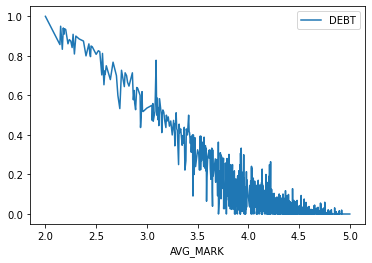

In [25]:
int_avg_mark = train_2.groupby('AVG_MARK').mean()
int_avg_mark.plot(y = "DEBT")

**Вывод - да, влияет; чем больше 'AVG_MARK', тем меньше вероятность возникновения задолженности**

Аналогично оценим показатель 'AVG_MARK_DISC'

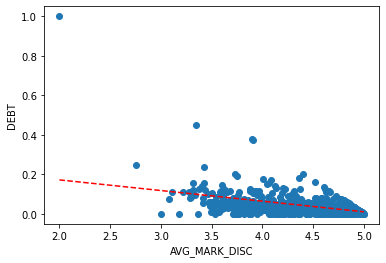

In [26]:
int_avg_mark_disc = train_2.groupby('AVG_MARK_DISC', as_index = False).mean()

x = int_avg_mark_disc['AVG_MARK_DISC']
y = int_avg_mark_disc['DEBT']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel("AVG_MARK_DISC")
plt.ylabel("DEBT")

plt.show()

**Чем меньше 'AVG_MARK_DISC', тем больше вероятность возникновения академической задолженности**

<AxesSubplot:xlabel='PRIZNAK'>

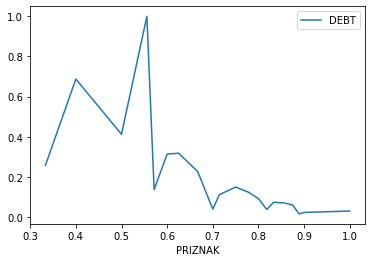

In [27]:
int_priznak = train_2.groupby('PRIZNAK').mean()
int_priznak.plot(y = "DEBT")

**Чем больше 'PRIZNAK', тем меньше вероятность возникновения задолженности**

<AxesSubplot:xlabel='TYPE_NAME'>

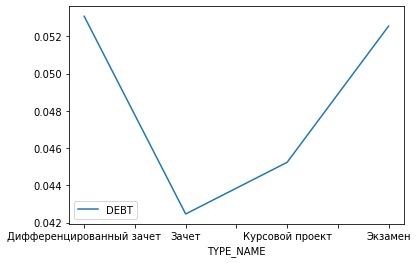

In [28]:
int_type_name = train_2.groupby('TYPE_NAME').mean()
int_type_name.plot(y = "DEBT")

**Самая низкая вероятность возникновения задолженности - на зачете, самая высокая - на диф. зачете и на экзамене**

<AxesSubplot:xlabel='SEMESTER'>

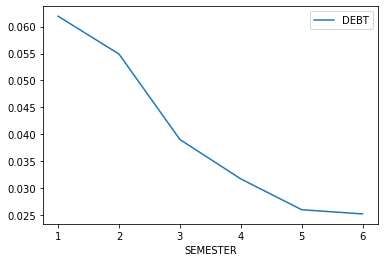

In [29]:
int_semester = train_2.groupby('SEMESTER').mean()
int_semester.plot(y = "DEBT")

**Вероятность возникновения задолженности падает с каждым последующим семестром**

**Вывод: показатели 'AVG_MARK', 'AVG_MARK_DISC', 'PRIZNAK','TYPE_NAME' и 'SEMESTER' влияют на таргет
и могут быть использованы для обучения модели**

## 5.2 one-hot-encoding

In [30]:
def encode_categorical(df_train, df_test):
    
    test_start_ind = df_train.index[-1]
    concated_df = pd.concat([df_train, df_test], sort=False) 
    encoded_df = pd.get_dummies(concated_df, drop_first=True) 
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_ind+1, :], encoded_df.iloc[test_start_ind+1:, :] 
    
    return df_train_encoded, df_test_encoded

In [31]:
X_train, X_test = encode_categorical(train_2.drop(columns = ['DEBT']), test_2)
y_train = train_2['DEBT']

X_test.head()

,ISU,SEMESTER,DISC_ID,DEBT_MEAN,DISC_DEBT_MEAN,AVG_MARK,AVG_MARK_DISC,PRIZNAK,PRIZNAK_KURS,TYPE_NAME_Зачет,TYPE_NAME_Курсовой проект,TYPE_NAME_Экзамен,GENDER_М,EXAM_TYPE_ЕГЭ,EXAM_TYPE_ОЛИМПИАДА
0,22160896830459167,3,552619236026332123,0.00671,0.050727,4.65,3.726659,1.0,0.937471,0,0,1,1,1,0
1,22160896830459167,3,5702509582319458883,0.00671,0.050727,4.65,4.858387,1.0,0.937471,1,0,0,1,1,0
2,22160896830459167,3,7735626259430674628,0.00671,0.050727,4.65,4.983287,1.0,0.937471,1,0,0,1,1,0
3,22160896830459167,3,8955667882044263414,0.00671,0.050727,4.65,4.824812,1.0,0.937471,1,0,0,1,1,0
4,22160896830459167,3,9075687484357010791,0.00671,0.050727,4.65,5.000000,1.0,0.937471,1,0,0,1,1,0


## 5.3 train_test_split

In [32]:
y = train_2['DEBT']
X = X_train

In [33]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.85)

# 6. Обучение модели

In [34]:
dt_clf = DecisionTreeClassifier()

In [35]:
dt_clf.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [36]:
dt_clf_pred = dt_clf.predict(X_test1)

In [37]:
matrix_dt_clf = confusion_matrix(y_test1, dt_clf_pred)
matrix_dt_clf

array([[24625,   431],
       [  394,   828]], dtype=int64)

<AxesSubplot:>

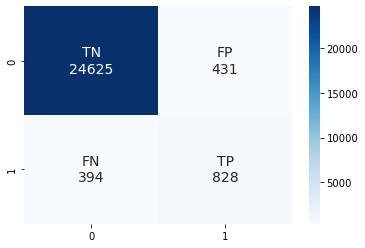

In [38]:
import seaborn as sns

group_names  = ['TN', 'FP', 'FN', 'TP']

group_counts = ["{0:0.0f}".format(value) for value in matrix_dt_clf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names, group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_dt_clf, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')

In [39]:
print('f1 score', round(f1_score(y_test1, dt_clf_pred), 5))
print('accuracy score', round(accuracy_score(y_test1, dt_clf_pred), 5))
print('precision score', round(precision_score(y_test1, dt_clf_pred), 5))
print('recall score', round(recall_score(y_test1, dt_clf_pred), 5))

f1 score 0.66747
accuracy score 0.9686
precision score 0.65766
recall score 0.67758


In [40]:
dt_clf_fin = DecisionTreeClassifier()

In [41]:
dt_clf_fin.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
text_representation_fin = tree.export_text(dt_clf_fin)
print(text_representation_fin)

|--- feature_5 <= 3.48
|   |--- feature_5 <= 2.71
|   |   |--- feature_5 <= 2.21
|   |   |   |--- feature_5 <= 2.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  2.03
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_6 <= 4.84
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1334903220308279296.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 9084023231685328896.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 8991996307463733248.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  8991996307463733248.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  9084023231685328896.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  1334903220308279296.00
|   |   |   |   |   |   |   |   |--- feature_5 <= 2.09
|   |   |   |   |   |   |   |   |   |-

In [43]:
dt_clf_pred_fin = dt_clf_fin.predict(X_test)

# 7. Формирование персонального учебного плана на основании прогноза академической задолженности

In [44]:
submission = test

In [45]:
submission['DEBT'] = dt_clf_pred_fin

In [46]:
submission_debt = submission.loc[submission['DEBT'] == 1].groupby(['ISU', 'DISC_ID'], as_index = False)\
.agg({'DEBT': 'count'}).sort_values(['ISU', 'DEBT'], ascending = False)

submission_debt

,ISU,DISC_ID,DEBT
1646,18441846113897984349,16952231586163840107,1
1639,18389542006057914970,6063951793857738920,2
1637,18389542006057914970,1545040236251244132,1
1638,18389542006057914970,5972842247015293043,1
1640,18389542006057914970,8481496464013045940,1
...,...,...,...
9,265090398491686393,13521939409505034311,1
1,248995915689497044,1839444663204205268,1
2,248995915689497044,8955667882044263414,1
3,248995915689497044,13626631834002853241,1


In [47]:
submission_debt.loc[submission_debt.ISU == 18389542006057914970]

,ISU,DISC_ID,DEBT
1639,18389542006057914970,6063951793857738920,2
1637,18389542006057914970,1545040236251244132,1
1638,18389542006057914970,5972842247015293043,1
1640,18389542006057914970,8481496464013045940,1
1641,18389542006057914970,9091216578705295340,1
1642,18389542006057914970,13896996746649112379,1
1643,18389542006057914970,14244765533472457518,1
1644,18389542006057914970,16952231586163840107,1
1645,18389542006057914970,18043062586384392771,1


# 8. Оформление решения

In [48]:
sample_submission = test

In [49]:
sample_submission['ID'] = sample_submission[['ISU', 'ST_YEAR', 'DISC_ID', 'SEMESTER', 'TYPE_NAME']].apply(
        lambda x: f'ISU:{x[0]} | ST_YEAR:{x[1]} | DISC_ID:{x[2]} | SEMESTER:{x[3]} | TYPE_NAME:{x[4]}', axis =1)

In [50]:
sample_submission['DEBT'] = dt_clf_pred_fin

In [51]:
sample_submission_2 = sample_submission[['ID', 'DEBT']]

In [52]:
sample_submission_2.to_csv('sample_submission.csv', index=False)